In [137]:
import pandas as pd
tweet = pd.read_csv("c:\\Users\\santi\\Downloads\\ProjectTweets.csv")
tweet.head(2)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [138]:
tweet = tweet.set_axis(['drop', 'ID', 'date', 'query', 'user','Text'], axis=1)
tweet = tweet[[ 'ID', 'date', 'query', 'user','Text']]
tweet.head(2)

,ID,date,query,user,Text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [139]:
if len(tweet['query'].unique()) <2:
    print("query only has 1 value, dropping query field")
    tweet = tweet[[ 'ID', 'date', 'user','Text']]
    print(tweet.columns)

query only has 1 value, dropping query field
Index(['ID', 'date', 'user', 'Text'], dtype='object')


In [140]:
tweet = tweet.drop_duplicates()
tweet.head(2)

,ID,date,user,Text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...


In [141]:
tweet = tweet[['date','Text']]

date_format = "%a %b %d %H:%M:%S PDT %Y"
# Convert to datetime 
tweet['date'] = pd.to_datetime(tweet['date'], format=date_format)
print(tweet['date'])

0         2009-04-06 22:19:49
1         2009-04-06 22:19:53
2         2009-04-06 22:19:57
3         2009-04-06 22:19:57
4         2009-04-06 22:20:00
                  ...        
1599994   2009-06-16 08:40:49
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:50
Name: date, Length: 1598314, dtype: datetime64[ns]


In [142]:
#checking hashtags
import re

def hashtags(tweet):
    hashtags = re.findall(r'#\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
hashtags_list = tweet['Text'].apply(hashtags).explode()
hashtags_list = hashtags_list.value_counts()
print(f'total hashtag: {len(hashtags_list)}')
hashtags_list[:20] #top 20 hashtags

total hashtag: 13653


#followfriday       2112
#fb                 1744
#squarespace         887
#FF                  586
#1                   519
#seb                 499
#FollowFriday        463
#musicmonday         404
#ff                  399
#iranelection        359
#2                   341
#fail                301
#BSB                 299
#myweakness          269
#iremember           268
#asot400             264
#marsiscoming        248
#mcflyforgermany     230
#andyhurleyday       188
#iPhone              185
Name: Text, dtype: int64

In [151]:
def tag(tweet):
    hashtags = re.findall(r'@\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
tag_list = tweet['Text'].apply(tag).explode()
tag_list = tag_list.value_counts()
print(f'total tag: {len(tag_list)}')
top1000_tag = tag_list[:1000] #top 10 hashtags

total tag: 356113


In [152]:
import warnings
warnings.filterwarnings("ignore")

filtered_tweets = pd.DataFrame(columns=['date','Text'])

for tag in top1000_tag.index:
    songs = tweet[tweet['Text'].str.contains(tag)]
    filtered_tweets = filtered_tweets.append(songs)


In [153]:
filtered_tweets.shape

(106093, 2)

In [154]:
filtered_tweets['Mentions'] = filtered_tweets['Text'].str.extract(r'@(\w+)')
filtered_tweets['Text'] = filtered_tweets['Text'].str.replace(r'@\w+', '')
filtered_tweets

,date,Text,Mentions
1020,2009-04-06 23:30:57,hahaha dont be like that one time in NY when ...,mileycyrus
2013,2009-04-07 00:45:20,"i have the same problem, but it's 4:43 here.....",mileycyrus
2072,2009-04-07 00:49:07,I guess counting sheep didn't work Hope you ...,mileycyrus
2079,2009-04-07 00:49:44,I would too if it meant spending a day in hea...,mileycyrus
2155,2009-04-07 00:56:41,AWWW u seriously have the cutest dog Miley! S...,mileycyrus
...,...,...,...
1454927,2009-06-07 02:22:21,of course we r!! BHs r nothing if not loyal!!...,davynathan
1479459,2009-06-07 10:58:21,Lol!!!! Ur too funny Mr Hottie Way - Ethan p...,davynathan
1496856,2009-06-07 17:17:29,excited 2 c u perform know ur gonna rock it,davynathan
1505282,2009-06-07 20:49:50,The baby daddy bus!!!!!!!,davynathan


In [155]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def is_positive(x):
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(x)["compound"]

filtered_tweets['score'] = filtered_tweets['Text'].apply(lambda x: is_positive(x))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [156]:
filtered_tweets

,date,Text,Mentions,score
1020,2009-04-06 23:30:57,hahaha dont be like that one time in NY when ...,mileycyrus,0.6090
2013,2009-04-07 00:45:20,"i have the same problem, but it's 4:43 here.....",mileycyrus,-0.6049
2072,2009-04-07 00:49:07,I guess counting sheep didn't work Hope you ...,mileycyrus,-0.4015
2079,2009-04-07 00:49:44,I would too if it meant spending a day in hea...,mileycyrus,0.5106
2155,2009-04-07 00:56:41,AWWW u seriously have the cutest dog Miley! S...,mileycyrus,0.8829
...,...,...,...,...
1454927,2009-06-07 02:22:21,of course we r!! BHs r nothing if not loyal!!...,davynathan,-0.3451
1479459,2009-06-07 10:58:21,Lol!!!! Ur too funny Mr Hottie Way - Ethan p...,davynathan,0.6209
1496856,2009-06-07 17:17:29,excited 2 c u perform know ur gonna rock it,davynathan,0.3400
1505282,2009-06-07 20:49:50,The baby daddy bus!!!!!!!,davynathan,0.0000


In [171]:
filtered_tweets['hour'] = pd.to_datetime(filtered_tweets['date'])
filtered_tweets['hour'] = filtered_tweets['hour'].dt.strftime('%Y-%m-%d %H')
hourly_grouped = filtered_tweets.groupby('hour')['score'].mean().reset_index()

In [172]:
filtered_tweets

,date,Text,Mentions,score,hour
1020,2009-04-06 23:30:57,hahaha dont be like that one time in NY when ...,mileycyrus,0.6090,2009-04-06 23
2013,2009-04-07 00:45:20,"i have the same problem, but it's 4:43 here.....",mileycyrus,-0.6049,2009-04-07 00
2072,2009-04-07 00:49:07,I guess counting sheep didn't work Hope you ...,mileycyrus,-0.4015,2009-04-07 00
2079,2009-04-07 00:49:44,I would too if it meant spending a day in hea...,mileycyrus,0.5106,2009-04-07 00
2155,2009-04-07 00:56:41,AWWW u seriously have the cutest dog Miley! S...,mileycyrus,0.8829,2009-04-07 00
...,...,...,...,...,...
1454927,2009-06-07 02:22:21,of course we r!! BHs r nothing if not loyal!!...,davynathan,-0.3451,2009-06-07 02
1479459,2009-06-07 10:58:21,Lol!!!! Ur too funny Mr Hottie Way - Ethan p...,davynathan,0.6209,2009-06-07 10
1496856,2009-06-07 17:17:29,excited 2 c u perform know ur gonna rock it,davynathan,0.3400,2009-06-07 17
1505282,2009-06-07 20:49:50,The baby daddy bus!!!!!!!,davynathan,0.0000,2009-06-07 20


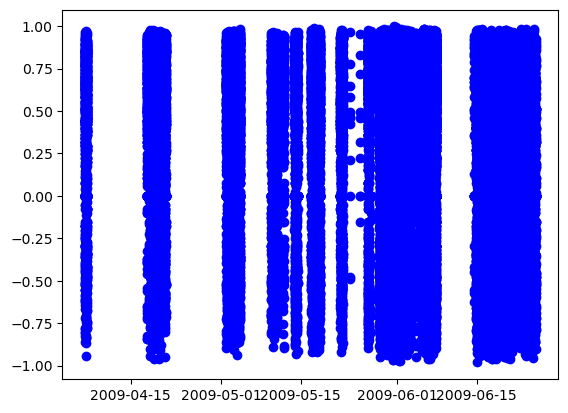

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(filtered_tweets['hour'], filtered_tweets['score'], label='Scores', color='blue', marker='o')

([<matplotlib.axis.XTick at 0x245542e2250>,
 [Text(0, 0, '0'),
  Text(50, 0, '50'),
  Text(100, 0, '100'),
  Text(150, 0, '150'),
  Text(200, 0, '200'),
  Text(250, 0, '250'),
  Text(300, 0, '300'),
  Text(350, 0, '350'),
  Text(400, 0, '400'),
  Text(450, 0, '450'),
  Text(500, 0, '500'),
  Text(550, 0, '550')])

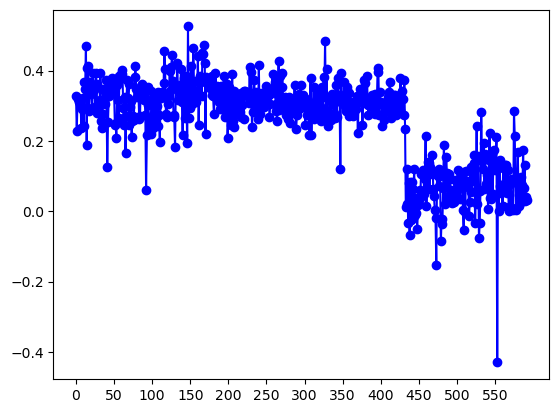

In [182]:
plt.plot(hourly_grouped['hour'], hourly_grouped['score'], label='Scores', color='blue', marker='o')
xticks_locations = range(0, 600,50)
xticks_labels = [str(x) for x in xticks_locations]  # Convert them to string labels if needed

# Set the xticks
plt.xticks(xticks_locations, xticks_labels)